In [2]:
pip install librosa soundfile numpy scikit-learn pyaudio


  Using cached librosa-0.10.2.post1-py3-none-any.whl.metadata (8.6 kB)
  Using cached soundfile-0.12.1-py2.py3-none-win_amd64.whl.metadata (14 kB)
   ---------------------------------------- 0.0/260.1 kB ? eta -:--:--
   - -------------------------------------- 10.2/260.1 kB ? eta -:--:--
   ------ -------------------------------- 41.0/260.1 kB 653.6 kB/s eta 0:00:01
   --------- ----------------------------- 61.4/260.1 kB 825.8 kB/s eta 0:00:01
   ------------ -------------------------- 81.9/260.1 kB 573.4 kB/s eta 0:00:01
   -------------------- ----------------- 143.4/260.1 kB 774.0 kB/s eta 0:00:01
   ---------------------------- --------- 194.6/260.1 kB 985.7 kB/s eta 0:00:01
   -------------------------------------- 260.1/260.1 kB 939.3 kB/s eta 0:00:00
   ---------------------------------------- 0.0/1.0 MB ? eta -:--:--
   --------- ------------------------------ 0.2/1.0 MB 7.6 MB/s eta 0:00:01
   ------------------ --------------------- 0.5/1.0 MB 5.8 MB/s eta 0:00:01
   -----

In [4]:
import librosa
import soundfile
import os, glob, pickle
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from scipy.stats import randint

In [5]:
def extract_feature(file_name, mfcc, chroma, mel):
    with soundfile.SoundFile(file_name) as sound_file:
        x=sound_file.read(dtype="float32")
        sample_rate=sound_file.samplerate
        if chroma:
            stft=np.abs(librosa.stft(x))
        result=np.array([])
        if mfcc:
            mfccs=np.mean(librosa.feature.mfcc(y=x,sr=sample_rate).T,axis=0)
            result=np.hstack((result,chroma))
        if chroma:
            chroma=np.mean(librosa.feature.chroma_stft(S=stft,sr=sample_rate).T,axis=0)
            result=np.hstack((result,chroma))
        if mel:
            mel=np.mean(librosa.feature.melspectrogram(y=x,sr=sample_rate).T,axis=0)
            result=np.hstack((result,mel))
    return result

In [41]:
emotions={
    '01': "neutral",
    '02': "calm",
    '03': "happy",
    '04': "sad",
    '05': "angry",
    '06': "fearful",
    '07': "disgust",
    '08': "surprised"
}
observed_emotions=['neutral','calm','happy']

In [42]:
def load_data(test_size=0.2):
    x,y=[],[]
    for file in glob.glob("D:\speech-emotion-recognition-ravdess-data\Actor_*\*.wav"):
        file_name=os.path.basename(file)
        emotion=emotions[file_name.split("-")[2]]
        if emotion not in observed_emotions:
            continue
        feature=extract_feature(file,mfcc=True,chroma=True,mel=True)
        x.append(feature)
        y.append(emotion)
    return train_test_split(np.array(x),y,test_size=test_size,random_state=9)

In [43]:
x_train,x_test,y_train,y_test=load_data(test_size=0.25)

Text(0, 0.5, 'Testing Accuracy')

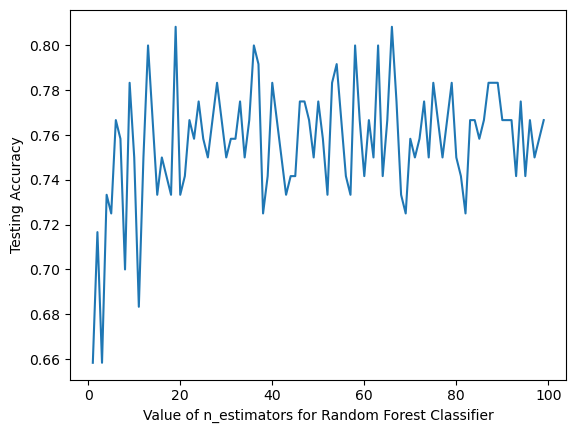

In [44]:
scores =[]
for k in range(1,100):
    rfc = RandomForestClassifier(n_estimators=k)
    rfc.fit(x_train, y_train)
    y_pred = rfc.predict(x_test)
    scores.append(accuracy_score(y_test, y_pred))
    
import matplotlib.pyplot as plt
%matplotlib inline

# plot the relationship between K and testing accuracy
# plt.plot(x_axis, y_axis)
plt.plot(range(1, 100), scores)
plt.xlabel('Value of n_estimators for Random Forest Classifier')
plt.ylabel('Testing Accuracy')


In [45]:
import numpy as np
rf = RandomForestClassifier(n_estimators=(np.argmax(np.array(scores))+1))
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
acc=accuracy_score(y_true=y_test,y_pred=y_pred)
print(acc*100.0)

78.33333333333333


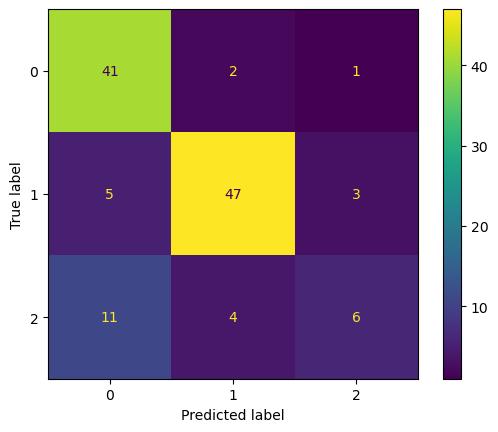

In [46]:
# Generate predictions with the best model
y_pred = rf.predict(x_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();